In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sps

In [8]:
df_Induction = pd.read_csv('../CSV_files/IFN Induction Genes.csv')
df_Rand = pd.read_csv('../CSV_files/Random_Genes.csv')

In [11]:
df_Induction.columns, df_Rand.columns = ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8'], ['ID','Nseqs','M0','TreeL','P-val','2dLNL','M8']
print df_Induction.head()
print '\n'
print df_Rand.head()

      ID  Nseqs       M0    TreeL      P-val      2dLNL   M8
0   AIM2     16  0.59897  0.73874   4.04E-06  21.246328  yes
1   DDX3     19  0.10917  0.58028     p>0.05  15.198006  yes
2  DDX41     17  0.05331  0.50841     p>0.05   0.022944  NaN
3  DDX58     18  0.34176  0.44445   2.93E-07  26.295116  yes
4  DDX60     13  0.30487  0.48340  0.0003593  12.732576  yes


        ID  Nseqs       M0    TreeL     P-val     2dLNL   M8
0    PYGO1     16  0.11171  0.26746  0.871442  0.026188  NaN
1  MSANTD3     13  0.04902  0.13291  0.863859  0.029400  NaN
2  PIP5K1A     16  0.05602  0.24939  0.701676  0.146734  NaN
3  FAM102A     20  0.06066  0.51489  0.691170  0.157822  NaN
4    GNAT3     19  0.04735  0.29761  0.690562  0.158478  NaN


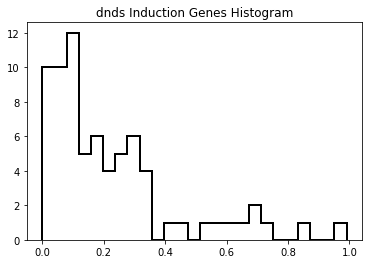

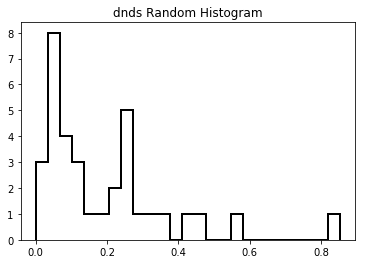

In [12]:

#dnds_vals = [_ for _ in np.nan_to_num(np.array(df['dN/dS M0'])) if _!=0]
dnds_Induction = df_Induction['M0']
dnds_Rand = df_Rand['M0']
plt.hist(dnds_Induction,bins=25,histtype='step',lw=2,color='k')
plt.title('dnds Induction Genes Histogram')
plt.show()

plt.hist(dnds_Rand,bins=25,histtype='step',lw=2,color='k')
plt.title('dnds Random Histogram')
plt.show()

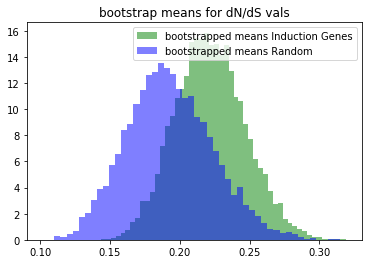

In [17]:

def bootstrap_samples_mean(array,nsamples=100):
    bootstrap_array = []
    for _ in range(nsamples):
        bootstrap_array.append(np.mean(np.random.choice(array,len(array),replace=True)))
    return bootstrap_array


bootstrap_mean_Induction = bootstrap_samples_mean(dnds_Induction,10000)
bootstrap_mean_Rand = bootstrap_samples_mean(dnds_Rand,10000)
plt.hist(bootstrap_mean_Induction,bins=50,color='green',alpha=0.5,label='bootstrapped means Induction Genes',normed=True)
plt.hist(bootstrap_mean_Rand,bins=50,color='blue',alpha=0.5,label='bootstrapped means Random',normed=True)


plt.title('bootstrap means for dN/dS vals')
#plt.axvline(np.mean(dnds_vals),color='k',lw)
plt.legend()
plt.savefig('../Figures/bootstrap_mean_histograms2.pdf')
plt.show()


In [18]:
false_pos_rate = len([_ for _ in bootstrap_mean_Induction if _ < max(bootstrap_mean_Rand)])/float(len(bootstrap_mean_Induction))
false_neg_rate = len([_ for _ in bootstrap_mean_Rand if _ > min(bootstrap_mean_Induction)])/float(len(bootstrap_mean_Rand))

In [19]:
print false_neg_rate, false_pos_rate

0.9521 1.0


In [20]:
# perform kolmogrov-smirnov test to test whether or not the two dNdS distributions are different:

sps.ks_2samp(dnds_Induction,dnds_Rand)

Ks_2sampResult(statistic=0.12006446414182115, pvalue=0.87030098423023849)